<a href="https://colab.research.google.com/github/Areenadel/public_repo/blob/main/ShAI_BootCamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Data Exploration

In [ ]:
df.shape

(148654, 13)

there is 148654 rows and 13 columns


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134438 entries, 0 to 134437
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                134438 non-null  int64  
 1   EmployeeName      134438 non-null  object 
 2   JobTitle          134438 non-null  object 
 3   BasePay           133832 non-null  float64
 4   OvertimePay       134437 non-null  float64
 5   OtherPay          134437 non-null  float64
 6   Benefits          98278 non-null   float64
 7   TotalPay          134437 non-null  float64
 8   TotalPayBenefits  134437 non-null  float64
 9   Year              134437 non-null  float64
 10  Notes             0 non-null       float64
 11  Agency            134437 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(9), int64(1), object(3)
memory usage: 13.3+ MB


In [ ]:
df.sample()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20663,20664,MICHAEL KIDD,MUSEUM SECURITY SUPERVISOR,60133.19,1016.43,16.89,NaN,61166.51,61166.51,2011.0,NaN,San Francisco,NaN


In [ ]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                float64
Notes               float64
Agency               object
Status              float64
dtype: object

There is 8 columns float64, 2 columns int64 and 3 columns object

In [ ]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

There 6 columns contain null value:

**Base Pay** contain 609 null values, we will handling it by the **mean value** because it can't be null or zero and the mean is a suitable value.

**OvertimePay** and **OtherPay** contain 4 null values, we will handling it by **zero** because there employees maybe dosen't work any addtional job hours.

**Benefits** contain 36163 null values, we will handling it by **zero** because the basic employees will not take any benifits.

**Status** and **Notes** have 148654 null values, that means there is no row contains data so we will **remove** them.

# Descriptive Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,148654.0,74327.500000,42912.857795,1.00,37164.250,74327.50,111490.750,148654.00
BasePay,148045.0,66325.448840,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.767297,8056.601866,-7058.59,0.000,811.27,4236.065,400184.25
Benefits,112491.0,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.000,2014.00
Notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Computation of measures of central tendency

#### Mean

In [ ]:
mean = df['TotalPay'].mean()

print(mean)

74768.32197169267


#### Median

In [ ]:
median = df['TotalPay'].median()

print(median)

71426.60999999999


#### Mode

In [ ]:
mode = df['TotalPay'].mode()

print(mode)

0    0.0
Name: TotalPay, dtype: float64


#### Observation


We can see that mean > median > mode. So, the distribution of Salary(TotalPay) is positively skewed. I will plot its distribution to confirm the same.

<Axes: xlabel='TotalPay', ylabel='Count'>

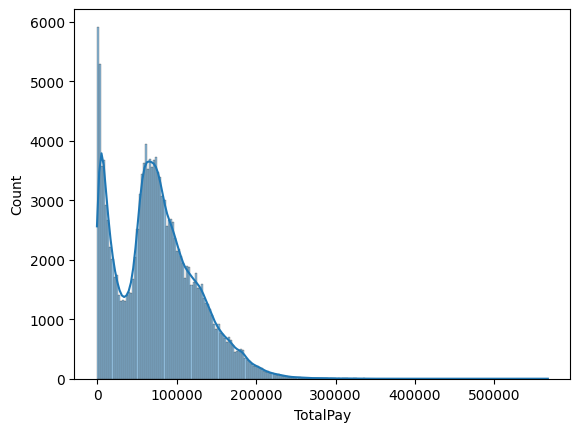

In [ ]:
data = df['TotalPay']

sns.histplot(data, kde=True, label = 'Salary')


The above plot confirms that the Salary is positively skewed.

### Computation of measures of variability

#### Minimum value

In [ ]:
min = df['TotalPay'].min()

min

-618.13

 This value may seen strange but employees actually may receive negative salary because they take unpaid leave or because they don't work enough hours to cover their insurance premiums.

#### Maximum value

In [ ]:
max = df['TotalPay'].max()

max

567595.43

#### Range

In [ ]:
range = max - min

range

568213.56

#### Variance

In [ ]:
var = df['TotalPay'].var()

var

2551967821.848279

#### Standard deviation

In [ ]:
std = df['TotalPay'].std()

std

50517.00527394987

#### Q1 or 25th percentile

In [ ]:
Q1 = df['TotalPay'].quantile(0.25)

Q1

36168.995

#### Median (Q2 or 50th percentile)

In [ ]:
Q2 = df['TotalPay'].quantile(0.5)

Q2

71426.60999999999

#### Q3 or 75th percentile

In [ ]:
Q3 = df['TotalPay'].quantile(0.75)

Q3

105839.135

#### Interquartile Range

In [ ]:
IQR = Q3  - Q1

IQR

69670.13999999998

#### Observation

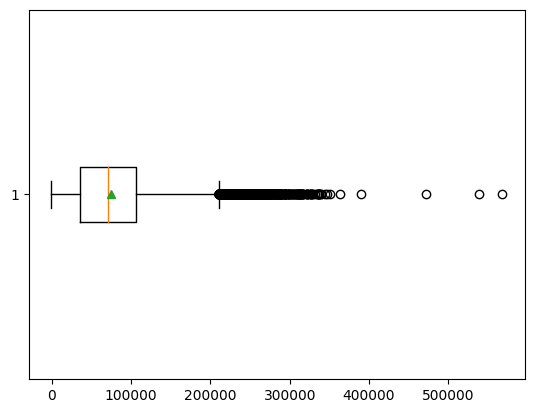

In [ ]:
plt.boxplot(data, vert =False, showmeans=True)
plt.show()

This poxplot chart describes salary(Totalpay) statistics.
As shown, **mean** shown by a green triangle which is 74768,  **median** shown by the line that divides the box which is 71426,**minimum** is -618, **maximum** is 567595.

As shown 25% of salaries less than or equal 36168	which is a Q1, 50% of salaries less than or equal 71426 which is a Q2 and 75% of salaries less than or equal 105839 which is Q3, then the **Interquartile Range** (IQR) equal to 69671.


# Data Cleaning

*To Remember*

There 6 columns contain null value:

**Base Pay** contain 609 null values, we will handling it by the **mean value** because it can't be null or zero and the mean is a suitable value.

**OvertimePay** and **OtherPay** contain 4 null values, we will handling it by **zero** because there employees maybe dosen't work any addtional job hours.

**Benefits** contain 36163 null values, we will handling it by **zero** because the basic employees will not take any benifits.

**Status** and **Notes** have 148654 null values, that means there is no row contains data so we will **remove** them.


In [2]:

df['BasePay'].fillna(df['BasePay'].mean(),inplace=True)

In [ ]:
df['OvertimePay'].fillna(0,inplace=True)

In [ ]:
df['OtherPay'].fillna(0,inplace=True)

In [ ]:
df['Benefits'].fillna(0,inplace=True)

In [ ]:
df.drop(['Status','Notes'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

**There is no null values Now!**

# Data Visualization

<Axes: xlabel='TotalPay', ylabel='Count'>

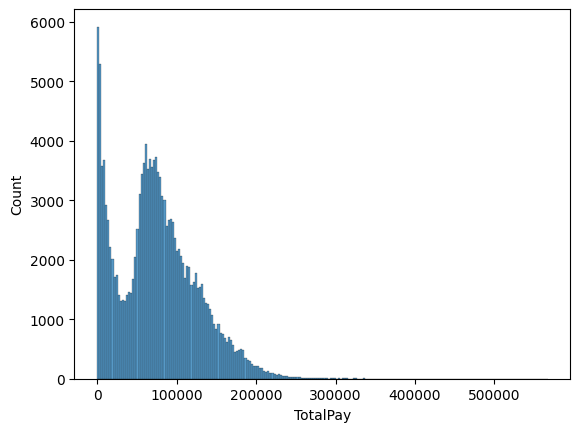

In [ ]:
sns.histplot(data=df['TotalPay'])


***The distribution of Salary(TotalPay) is positively skewed.***

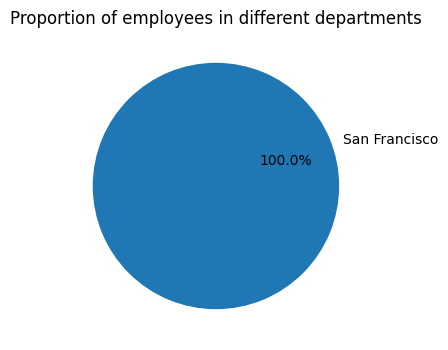

In [30]:
group = df.groupby('Agency')['Agency'].count()
group.plot.pie(autopct='%1.1f%%',startangle = 200,figsize=(4,4))
plt.ylabel(None)
plt.title("Proportion of employees in different departments")
plt.show()


This pie chart shows that **all employees** in the same department which is *San Francisco*

# Grouped Analysis

In [ ]:
df_copy = df

In [ ]:
df_copy.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [ ]:
for (method, group) in df_copy.groupby('Year'):
    print("{0:10},  shape={1}".format(method, group.shape))

      2011,  shape=(36159, 13)
      2012,  shape=(36766, 13)
      2013,  shape=(37606, 13)
      2014,  shape=(38123, 13)


That show the number of the employees **increase** by the years

In [ ]:
df_copy.groupby('Year')['TotalPay'].describe().T

Year,2011,2012,2013,2014
count,36159.000000,36766.000000,37606.000000,38123.000000
mean,71744.103871,74113.262265,77611.443142,75463.918140
std,47498.706594,49523.904319,52854.774783,51697.713029
min,0.000000,0.000000,0.000000,-618.130000
25%,36810.760000,37560.607500,36754.995000,33436.210000
50%,68213.240000,70714.680000,74500.015000,72359.980000
75%,102512.680000,104099.170000,109637.670000,107974.445000
max,567595.430000,362844.660000,347102.320000,471952.640000


In [ ]:
df.groupby('Year')['BasePay','OvertimePay','OtherPay','TotalPay'].aggregate([min, np.median, max]).T

<ipython-input-28-9d58d1642a38>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Year')['BasePay','OvertimePay','OtherPay','TotalPay'].aggregate([min, np.median, max]).T


Year                     2011        2012        2013       2014
BasePay     min          0.00    -166.010      15.830       0.00
            median   62871.72   64017.370   67669.000   65055.00
            max     294580.02  302578.000  319275.010  318835.49
OvertimePay min          0.00       0.000      -0.010       0.00
            median       0.00       0.000       0.000       0.00
            max     245131.88  220909.480  196689.180  173547.73
OtherPay    min          0.00       0.000   -7058.590    -618.13
            median     795.60     920.645     792.060     695.89
            max     400184.25  245999.410  202322.370  342802.63
TotalPay    min          0.00       0.000       0.000    -618.13
            median   68213.24   70714.680   74500.015   72359.98
            max     567595.43  362844.660  347102.320  471952.64

This show the differences between BasePay, OvertimePay, OtherPay and TotalPay by the years.


In [ ]:
df.groupby('Year')['JobTitle'].describe()

,count,unique,top,freq
Year,,,,
2011,36159,1045,TRANSIT OPERATOR,2388
2012,36766,1044,Transit Operator,2262
2013,37606,1051,Transit Operator,2295
2014,38123,997,Transit Operator,2479


# Simple Correlation Analysis

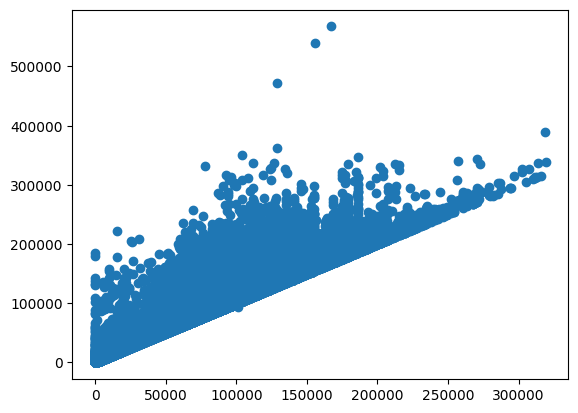

In [33]:
plt.scatter(df['BasePay'],df['TotalPay'])

The relation between BasePay and TotalPay is **Strong Positive** Correlation.

<ipython-input-10-a3ac2d740b6d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,cmap='Blues')


<Axes: >

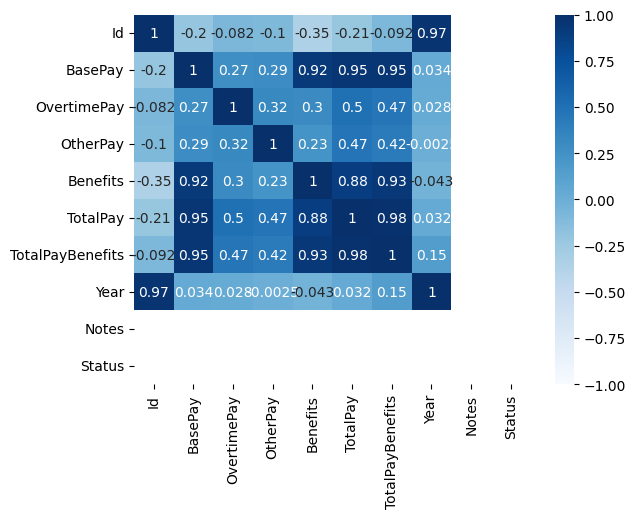

In [ ]:
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,cmap='Blues')

# Summary of Insights

This dataset contains salary information for the employees in the company by four years (2011-2014).

All employees belong to the same agency 'San Francisco'.

The number of employees icreasing by the years, especially 2013 in which the increase was 840 employees.

The jobs title increased, but 2014 was not in which the company abandoned 54 of them, this sitution raised some questions in my mind, such that does the compay effected of that or not!.

The TotalPay (salary) for some employees in 2014 less than zero which that reflect the employees behaviors tends towards laziness and lack of production.

The relationship between BasePay and benifits is strongly positive.

The relationship between BasePay and TotalPay is strongly positive.

# Good Luck!